Krishna Sharma | AP22110010128

In [65]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [45]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
train = pd.read_csv('imdb_train.csv', header=None)
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25001 non-null  object
 1   1       25001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


,0,1
0,0,1
1,"This film is absolutely awful, but nevertheles...",0
2,Well since seeing part's 1 through 3 I can hon...,0
3,I got to see this film at a preview and was da...,1
4,This adaptation positively butchers a classic ...,0


In [47]:
test = pd.read_csv('imdb_test.csv', header=None)
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       25001 non-null  object
 1   1       25001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


,0,1
0,0,1
1,I did not enjoy the film Eraser whatsoever. It...,0
2,Be very afraid of anyone who likes this film. ...,0
3,The 3rd and last big screen spin off from the ...,0
4,Barely three and a half years after just scrap...,1


In [48]:
train.columns = ['review', 'sentiment']
test.columns = ['review', 'sentiment']

print(train.isnull().sum())
print(test.isnull().sum())

review       0
sentiment    0
dtype: int64
review       0
sentiment    0
dtype: int64


In [49]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower() 
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [50]:
train['review'] = train['review'].apply(preprocess)
test['review'] = test['review'].apply(preprocess)

In [51]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train['review'])
X_test_tfidf = vectorizer.transform(test['review'])
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
nb = MultinomialNB()
scores_nb = cross_val_score(nb, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Naive Bayes Cross-Validation Accuracy:", scores_nb.mean())
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Naive Bayes Cross-Validation Accuracy: 0.8473659428114377
Naive Bayes Accuracy: 0.8355665773369065
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     12500
           1       0.85      0.81      0.83     12501

    accuracy                           0.84     25001
   macro avg       0.84      0.84      0.84     25001
weighted avg       0.84      0.84      0.84     25001



In [53]:
dt = DecisionTreeClassifier(random_state=42)
scores_dt = cross_val_score(dt, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Accuracy:", scores_dt.mean())
dt.fit(X_train_tfidf, y_train)
y_pred_dt = dt.predict(X_test_tfidf)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Cross-Validation Accuracy: 0.7087719976004798
Decision Tree Accuracy: 0.7110515579376825
              precision    recall  f1-score   support

           0       0.71      0.72      0.71     12500
           1       0.71      0.70      0.71     12501

    accuracy                           0.71     25001
   macro avg       0.71      0.71      0.71     25001
weighted avg       0.71      0.71      0.71     25001



In [54]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores_rf = cross_val_score(rf, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy:", scores_rf.mean())
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Cross-Validation Accuracy: 0.8378465826834633
Random Forest Accuracy: 0.8394864205431782
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12500
           1       0.85      0.82      0.84     12501

    accuracy                           0.84     25001
   macro avg       0.84      0.84      0.84     25001
weighted avg       0.84      0.84      0.84     25001



In [55]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
scores_xgb = cross_val_score(xgb, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Accuracy:", scores_xgb.mean())
xgb.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb.predict(X_test_tfidf)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Cross-Validation Accuracy: 0.842646126774645
XGBoost Accuracy: 0.8477660893564257
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     12500
           1       0.83      0.87      0.85     12501

    accuracy                           0.85     25001
   macro avg       0.85      0.85      0.85     25001
weighted avg       0.85      0.85      0.85     25001



In [56]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
scores_ada = cross_val_score(ada, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("AdaBoost Cross-Validation Accuracy:", scores_ada.mean())
ada.fit(X_train_tfidf, y_train)
y_pred_ada = ada.predict(X_test_tfidf)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost Cross-Validation Accuracy: 0.7689292861427715
AdaBoost Accuracy: 0.7677292908283668
              precision    recall  f1-score   support

           0       0.81      0.69      0.75     12500
           1       0.73      0.84      0.78     12501

    accuracy                           0.77     25001
   macro avg       0.77      0.77      0.77     25001
weighted avg       0.77      0.77      0.77     25001



In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_val_score(knn, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("K-Nearest Neighbors Cross-Validation Accuracy:", scores_knn.mean())
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Cross-Validation Accuracy: 0.7311697580483904
K-Nearest Neighbors Accuracy: 0.6460541578336867
              precision    recall  f1-score   support

           0       0.69      0.53      0.60     12500
           1       0.62      0.76      0.68     12501

    accuracy                           0.65     25001
   macro avg       0.65      0.65      0.64     25001
weighted avg       0.65      0.65      0.64     25001



In [61]:
ensemble = VotingClassifier(estimators=[('DecisionTree', dt),('NaiveBayes', nb),('KNN', knn)], voting='hard')
scores_ensemble = cross_val_score(ensemble, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Ensemble Cross-Validation Accuracy:", scores_ensemble.mean())
ensemble.fit(X_train_tfidf, y_train)
y_pred_ensemble = ensemble.predict(X_test_tfidf)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))

Ensemble Cross-Validation Accuracy: 0.8320465666866627
Ensemble Accuracy: 0.8016479340826367
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     12500
           1       0.79      0.83      0.81     12501

    accuracy                           0.80     25001
   macro avg       0.80      0.80      0.80     25001
weighted avg       0.80      0.80      0.80     25001



In [62]:
print("Naive Bayes classifier: ",scores_nb.mean())
print("Decision tree: ", scores_dt.mean())
print("Random forest: ", scores_rf.mean())
print("XGboost: ", scores_xgb.mean())
print("Adaboost: ", scores_ada.mean())
print("K-Nearest Neighbors: ", scores_knn.mean())
print("Ensemble: ", scores_ensemble.mean())

Naive Bayes classifier:  0.8473659428114377
Decision tree:  0.7087719976004798
Random forest:  0.8378465826834633
XGboost:  0.842646126774645
Adaboost:  0.7689292861427715
K-Nearest Neighbors:  0.7311697580483904
Ensemble:  0.8320465666866627


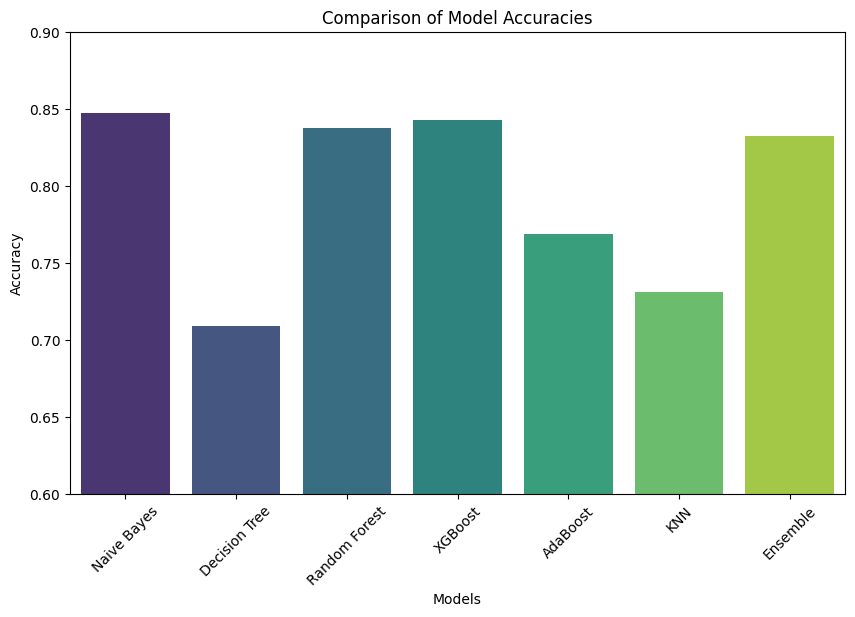

In [67]:
accuracies = {
    "Naive Bayes": scores_nb.mean(),
    "Decision Tree": scores_dt.mean(),
    "Random Forest": scores_rf.mean(),
    "XGBoost": scores_xgb.mean(),
    "AdaBoost": scores_ada.mean(),
    "KNN": scores_knn.mean(),
    "Ensemble": scores_ensemble.mean()
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45)
plt.ylim(0.6, 0.9)
plt.show()